## Homework 5 (A prerequisite for Project)

In your project, you are expected to evaluate alternative trading strategies (i.e. algorithmic trading). "Algorithmic or Quantitative trading is the process of designing and developing trading strategies based on mathematical and statistical analyses" ([source](https://www.freecodecamp.org/news/algorithmic-trading-in-python/)). This requires a connection to a data source and this homework is related to setting up the required connections and some simple data manipulation steps. 


### Task 1
This task requires to set up a free account for Quandl API [https://docs.data.nasdaq.com/](https://docs.data.nasdaq.com/). This [link](https://docs.data.nasdaq.com/docs/python-installation) provides the details about installation of the quandl module and setting up authentication details to get relevant information.

- Install quandl using command window (or web interface will also work fine if you use Anaconda Navigator) <br> 
pip install quandl
- Check if it is installed by importing the module as below. If there is no error, you are good to go.

In [1]:
import quandl

- Create an account if you do not have any from the [link](https://data.nasdaq.com/sign-up). Signing-up as "academic" is suggested.
- You will receive your API key once you complete your registration. 
- If you already have an account, you can find your API key from your account details.
- We will import pandas and quandl modules to check if everything works. 
- Set your API key (i.e. register within Python)
- Send a sample data request.

In [2]:
import pandas as pd
import quandl as q
import matplotlib.pyplot as plt
import numpy as np
# set the API key
q.ApiConfig.api_key = "-V19Eji2UiUJ_Qunc_d8"

#send a get request to query Tesla's end of day stock prices from 1st #Jan, 2010 to 1st Jan, 2019
tesla_data = q.get("WIKI/TSLA", start_date="2010-01-01", end_date="2018-01-01")

# check the first 5 rows of the dataframe
tesla_data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


Note that get method requires certain arguments in some form. The details of the call is provided [here](https://docs.data.nasdaq.com/docs/parameters-2#section-times-series-parameters). We made a request to TESLA's daily prices between two dates by "WIKI/TSLA". WIKI is a data product code. The details on the data organization is provided [here](https://docs.data.nasdaq.com/docs/data-organization). Some of the products are free as you can see from the link. We have used "WIKI" free product which is "End of Day US Stock Prices" to get TESLA prices. There are some other prices/indices that are available for free. You can check those in you are interested.

Once you have obtained the information in a pandas dataframe, this task is completed.

### Task 2

Implement a function that calculates simple moving average (SMA) of closing prices. Note that simple moving average calculates the average of the values in the most recent past $k$ periods (day in our case). Therefore the function will take an argument "number of periods". Technical analysis people like to use such statistics in order to make trading decisions. You can find [this link](https://www.profitaddaweb.com/2017/07/smasimple-moving-average-technical.html) useful.

In [3]:
def SMA(n_of_periods):
    closing_prices = tesla_data[["Close"]]
    return closing_prices.rolling(n_of_periods).mean()

Text(0.5, 1.0, 'Price and SMA')

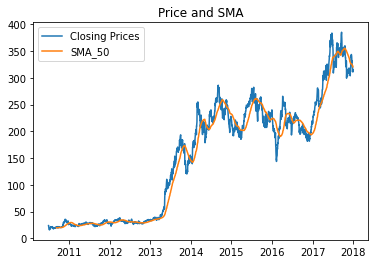

In [4]:
SMA_50 = SMA(n_of_periods=50)
plt.plot(tesla_data[["Close"]])
plt.plot(SMA_50)
plt.legend(["Closing Prices","SMA_50"])
plt.title("Price and SMA")

### Task 3

Implement a function that calculates simple moving standard deviation of closing prices so that one can have some understanding of the volatility in the prices. 

In [5]:
def SM_STD(n_of_periods):
    closing_prices = tesla_data[["Close"]]
    return closing_prices.rolling(n_of_periods).std()

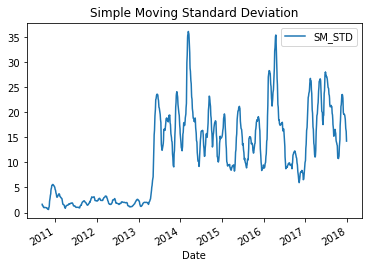

In [6]:
SM_STD(n_of_periods = 50).plot()
plt.title("Simple Moving Standard Deviation")
plt.legend(["SM_STD"])

In [7]:
# CREATING THE DATA

k = 50                                             # k : number of days
SMA_k = SMA(k)                                     # k days simple moving average
SM_STD_k = SM_STD(k)                               # k days simple moving standard deviation
tesla = tesla_data[["Close"]].copy()               # copy everyday of close prices to a new dataframe which has the name tesla
tesla["SMA_"+str(k)] = SMA_k                       # create columns of SMA and SMSTD 
tesla["STD_"+str(k)] = SM_STD_k
tesla = tesla.loc[tesla.index >= "2017-01-01"]     # pull out the rows that are not in 2017


### Task 4

Assume that you are asked to devise a simple trading strategy which takes moving standard deviation and average into account. As an example, you may end up with such a strategy:

- If moving standard deviation is larger than some number, do nothing (this is kind of a risk averse setting)
- If last price observed is larger than the average, buy the stock, sell otherwise.

This is just a very simple example based on the moving statistics of the closing prices. You may end up with a better strategy. In order to understand if the strategy is reasonable, we generally try to see the performance of the trading algorithm using a predefined past period. This is so called backtesting. This will be done in a paper-trading setting. A paper trade is a simulated trade that allows an investor to practice buying and selling without risking real money. Note that paper trading may not be representative of the real trade because of the market dynamics.

Here we will assume that you have 1 unit of money allowed for trading each day. You can invest or keep it. If you pass investing on a day (because of some rule you use like in the volatility example above), it is assumed that you lost the opportunity (in other words, the money to be invested is not accumulated for the use on the next day).

Implement a trading strategy based on the statistics and evaluate the strategy for the year 2017 on the Tesla prices. You need to keep track of the everyday actions in a pandas dataframe then report the invested money and total value of your investment at the end of the year. Report relevant statistics (be creative here).

# PROPOSED STRATEGY:
### Buy the stock when price is higher than SMA and sell it until SMA is greater than the price.
### Don't change position when the volatility is too high

In [8]:
# IMPLEMENTING THE STRATEGY

# create std threshold
std_mean = tesla["STD_"+str(k)].mean()             # mean of SM_STD for 2017
std_std = tesla["STD_"+str(k)].std()               # std of  SM_STD for 2017
s = std_mean + std_std                             # s : std threshold -> do nothing when std >= s

# create buy or sell signal
signal = (tesla["SMA_"+str(k)] < tesla["Close"])   # check if the price is grater then SMA_k
signal = signal.astype(int)                        # convert boolean to integer (0: price <= SMA_k; 1: price > SMA_k)
tesla["Signal"] = signal   

volatile_days = tesla["STD_"+str(k)] >= s          # the days when SM_STD greater then the threshold s
tesla.loc[volatile_days, "Signal"] = np.nan        # do nothing on volatile days
tesla = tesla.ffill(axis = 0)                      # hold the same position on volatile days
tesla["Signal"] = tesla["Signal"].diff()           # 1: buy signal; 0: hold position; -1: sell signal
tesla.head()


,Close,SMA_50,STD_50,Signal
Date,,,,
2017-01-03,216.99,196.2010,10.384939,NaN
2017-01-04,226.99,196.7390,11.251183,0.0
2017-01-05,226.75,197.2188,11.999799,0.0
2017-01-06,229.01,197.7522,12.798271,0.0
2017-01-09,231.28,198.3330,13.637507,0.0


In [9]:
tesla.iloc[0,-1] = (tesla.iloc[0]["SMA_"+str(k)] < tesla.iloc[0]["Close"]).astype(int) # fixing the first day's signal
tesla.head()

,Close,SMA_50,STD_50,Signal
Date,,,,
2017-01-03,216.99,196.2010,10.384939,1.0
2017-01-04,226.99,196.7390,11.251183,0.0
2017-01-05,226.75,197.2188,11.999799,0.0
2017-01-06,229.01,197.7522,12.798271,0.0
2017-01-09,231.28,198.3330,13.637507,0.0


In [10]:
trades = tesla[tesla["Signal"] != 0].copy()         # days when the stock is bought and sold
trades.head(6)

,Close,SMA_50,STD_50,Signal
Date,,,,
2017-01-03,216.99,196.2010,10.384939,1.0
2017-03-08,246.87,247.5328,18.246132,-1.0
2017-03-14,258.00,250.0422,15.860591,1.0
2017-03-21,250.68,253.6112,12.943019,-1.0
2017-03-22,255.01,254.0858,12.536133,1.0
2017-07-27,334.46,342.7562,24.170195,-1.0


In [11]:
trades["Buy_Sell_return"] = trades["Close"].pct_change()
trades.loc[trades.Signal == 1, "Buy_Sell_return"] = np.nan
trades.head()                                       # Buy_Sell_return : return after each buy-sell trade.

,Close,SMA_50,STD_50,Signal,Buy_Sell_return
Date,,,,,
2017-01-03,216.99,196.2010,10.384939,1.0,NaN
2017-03-08,246.87,247.5328,18.246132,-1.0,0.137702
2017-03-14,258.00,250.0422,15.860591,1.0,NaN
2017-03-21,250.68,253.6112,12.943019,-1.0,-0.028372
2017-03-22,255.01,254.0858,12.536133,1.0,NaN


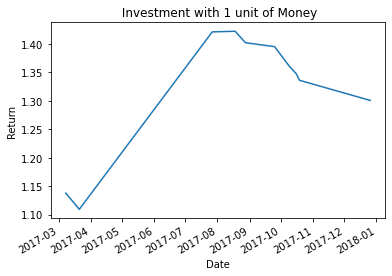

We have invested 1 unit of money everytime when the buy signal emerged.


In [12]:
(trades["Buy_Sell_return"].dropna().cumsum()+1).plot()
plt.ylabel("Return")
plt.title(" Investment with 1 unit of Money")
plt.show()
print("We have invested 1 unit of money everytime when the buy signal emerged.")

Text(0.5, 1.0, 'Sharpe ratio = 2.706452960777038')

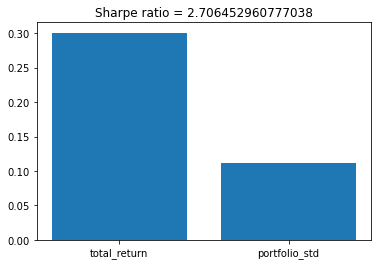

In [13]:
# Sharpe Ratio
total_return =  trades["Buy_Sell_return"].dropna().sum()
portfolio_std = trades["Buy_Sell_return"].dropna().std()
sharpe = total_return / portfolio_std
plt.bar(["total_return","portfolio_std"],[total_return,portfolio_std])
plt.title("Sharpe ratio = "+ str(sharpe))

Text(0, 0.5, '# of trades')

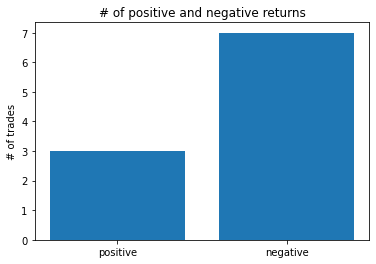

In [14]:
# Number of positive returns vs number of negatif returns
n_of_pos_returns = (trades["Buy_Sell_return"]>0).sum()
n_of_neg_returns = (trades["Buy_Sell_return"]<0).sum()

plt.bar(["positive","negative"],[n_of_pos_returns,n_of_neg_returns])
plt.title("# of positive and negative returns")
plt.ylabel("# of trades")

### Even if the strategy has a good sharpe ratio, I think it is not reliable because there is not so much trades and many of them are concluded with negative return

### Task 5

One important baseline strategy that is commonly used in trading algorithm evaluation is buy and hold strategy. Assume that you have invested 1 unit of money every day (in the form of a "buy" decision) and hold it. What is the final status of your investment. Compare with your proposed strategy.

In [15]:
buy_hold_trades = trades[trades["Signal"]==1].iloc[:,:-1]
total_money_invested = len(buy_hold_trades)
average_cost = buy_hold_trades.Close.mean()
last_price = tesla.iloc[-1]["Close"]
print("total money invested : ", total_money_invested," units of money")
print("average stock cost is ", average_cost)
print("last price of the stock is", last_price )
print("average return is", last_price/average_cost -1 )

total money invested :  10  units of money
average stock cost is  317.24799999999993
last price of the stock is 311.35
average return is -0.018591133750251898


In [16]:
# Buy Positions
buy_hold_trades.append(tesla.iloc[-1])

,Close,SMA_50,STD_50,Signal
Date,,,,
2017-01-03,216.99,196.2010,10.384939,1.0
2017-03-14,258.00,250.0422,15.860591,1.0
2017-03-22,255.01,254.0858,12.536133,1.0
2017-08-03,347.09,344.8938,22.067600,1.0
2017-08-23,352.77,347.7628,20.762762,1.0
2017-08-29,347.36,345.6988,19.195450,1.0
2017-10-04,355.01,352.1674,13.835482,1.0
2017-10-10,355.59,353.6452,12.698135,1.0
2017-10-17,355.75,354.9966,10.921436,1.0


### Buy and Hold Strategy performed worse than the previous strategy. It is needed to invest more money and it made negative return at the and of the year